In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics

In [27]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "The big brown dog jumped over the lazy mouse.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)


In [30]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Top terms per cluster:
Cluster 0:
 google
 map
 app
 feedback
 impressed
 incredible
 translate
 key
 chrome
 extension


Cluster 1:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 squooshy
 merley


Cluster 2:
 jumped
 mouse
 big
 brown
 lazy
 dog
 impressed
 google
 feedback
 face




In [32]:
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Prediction
[0]
[1]


In [33]:

import collections


clustering = collections.defaultdict(list)
 
for idx, label in enumerate(model.labels_):
    clustering[label].append(idx)
print (clustering)


defaultdict(<class 'list'>, {1: [0, 1, 4, 5], 0: [2, 3, 7, 8], 2: [6]})


In [34]:
from sklearn.cluster import AgglomerativeClustering

#number of clusters 
true_k = 3
model_AgglomerativeClustering = AgglomerativeClustering(n_clusters=true_k)
model_AgglomerativeClustering.fit(X.toarray() )

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [35]:
model_AgglomerativeClustering.labels_

array([0, 2, 1, 1, 2, 2, 0, 1, 1])

In [36]:
pca = PCA(n_components=2, random_state=21)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

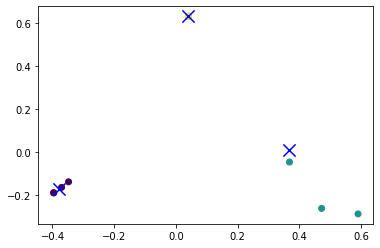

In [37]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')